In [2]:
import numpy as np
import pandas
import csv
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#fpath = Path(mpl.get_data_path(), "/ccs/home/davidsonrb/.fonts/Helvetica.ttc")

task_timings_file = 'timings.csv'   # timing file output from the dask tskmgr script
start_time = 'Mar 22 21:09:16 2022' # start time printed in the stdout of the submit script
end_time = 'Mar 22 21:23:02 2022'   # end time printed in the stdout of the submit script


In [3]:
st = datetime.strptime(start_time, "%b %d %H:%M:%S %Y") # change formatting as needed
et = datetime.strptime(end_time, "%b %d %H:%M:%S %Y")
print(st.timestamp())
print(et.timestamp())
total_time = (et - st).total_seconds()
print(total_time)

1647997756.0
1647998582.0
826.0


In [4]:
task_timings = pandas.read_csv(task_timings_file)

In [5]:
task_timings

,hostname,worker_id,start_time,stop_time,run_num
0,h35n15,Worker-ac3e24fb-4b2f-4860-854c-d7336e8bb72f,1.647998e+09,1.647998e+09,NaN
1,h35n15,Worker-413e9e5d-6ab7-4736-b0f6-9e01369ab898,1.647998e+09,1.647998e+09,NaN
2,h35n15,Worker-2dedc33a-0bec-41bb-912d-760815f6ad00,1.647998e+09,1.647998e+09,NaN
3,h35n15,Worker-92d49d97-7c08-48f3-a359-4b9a835c52a7,1.647998e+09,1.647998e+09,NaN
4,h35n15,Worker-8d863ae9-d5d3-4710-bdac-4d3deaad0a49,1.647998e+09,1.647998e+09,NaN
5,h35n15,Worker-7e106c46-8238-48ec-8c54-0983ddfa3b59,1.647998e+09,1.647998e+09,NaN
6,h35n15,Worker-413e9e5d-6ab7-4736-b0f6-9e01369ab898,1.647998e+09,1.647998e+09,NaN
7,h35n15,Worker-ac3e24fb-4b2f-4860-854c-d7336e8bb72f,1.647998e+09,1.647998e+09,NaN
8,h35n15,Worker-92d49d97-7c08-48f3-a359-4b9a835c52a7,1.647998e+09,1.647998e+09,NaN
9,h35n15,Worker-2dedc33a-0bec-41bb-912d-760815f6ad00,1.647998e+09,1.647998e+09,NaN


In [6]:
task_timings.dtypes

hostname       object
worker_id      object
start_time    float64
stop_time     float64
run_num       float64
dtype: object

247.63077974319458 257.263733625412 249.51152098178864


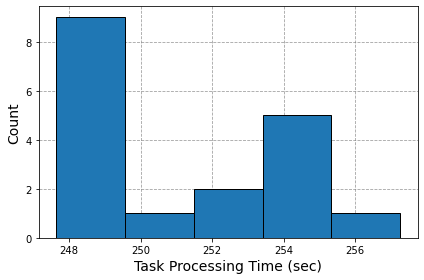

In [7]:
### Grabbing each task's stop and start times and taking the difference to calculate the total time spent on each individual task
# histogram those results
individual_task_times = np.array(task_timings['stop_time'] - task_timings['start_time'])
print(np.min(individual_task_times),np.max(individual_task_times),np.median(individual_task_times))

plt.hist(individual_task_times,bins='sqrt',ec='k',zorder=3)
#plt.plot([np.max(individual_task_times),np.max(individual_task_times)],[0,25],'r-',zorder=3)
#plt.plot([np.median(individual_task_times),np.median(individual_task_times)],[0,1000],'r-',zorder=2)
#plt.text(np.max(individual_task_times),40,"Max",ha='right',zorder=2)
plt.xlabel('Task Processing Time (sec)',size=14)
plt.ylabel('Count',size=14)
#plt.xlim((-0.1,500))
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('individual_task_timing_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

In [8]:
np.min(task_timings['start_time']) - st.timestamp()

62.61052489280701

Averages: [753.30899179  62.610888     8.43429557   1.64582463]
Median: [752.08367062  62.6109972    9.65970826   1.64585412]
StDev: [4.03044405e+00 2.64488459e-04 4.03046995e+00 2.27918245e-04]
(6, 4)
5


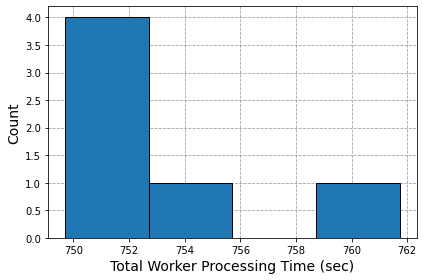

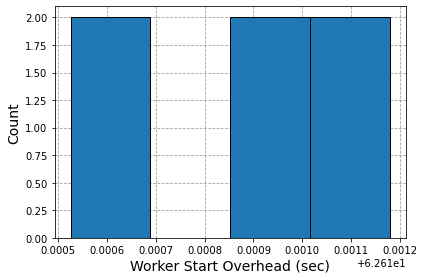

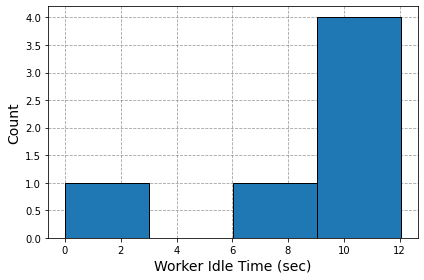

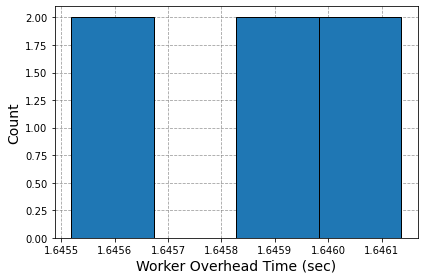

In [9]:
# grabbing the last task's stop time
last_task_end = np.max(task_timings['stop_time'])
# calculate the end overhead for shutting down client and dask cluster
end_overhead = et.timestamp() - last_task_end
# get the unique set of workers
workers = list(set(task_timings['worker_id']))

worker_data = []
for worker in workers:
    # get indices of rows in the dataframe assocaited with the specific worker
    indices = task_timings['worker_id'] == worker
    # calculate total worker processing time
    worker_task_time = np.sum(task_timings[indices]['stop_time'] - task_timings[indices]['start_time'])
    # grab worker's initial start and final stop times
    worker_start_time = np.min(task_timings[indices]['start_time'])
    worker_stop_time  = np.max(task_timings[indices]['stop_time'])
    # calculate start overhead
    start_overhead  = worker_start_time - st.timestamp()
    # calculate idle time after all worker's tasks have finished but other workers' tasks are still running
    idle_time = last_task_end - worker_stop_time
    # overhead time between tasks being worked on
    worker_overhead = total_time - worker_task_time - idle_time - start_overhead
    
    worker_data.append([worker_task_time,start_overhead,idle_time,worker_overhead])
worker_data = np.array(worker_data)
print('Averages:',np.mean(worker_data,axis=0))
print('Median:',np.median(worker_data,axis=0))
print('StDev:',np.std(worker_data,axis=0))

print(worker_data.shape)
nWorkers = worker_data.shape[0]
nBins = int(0.9*nWorkers)
print(nBins)

plt.hist(worker_data[:,0],bins='auto',ec='k',zorder=3)
plt.xlabel('Total Worker Processing Time (sec)',size=14)
plt.ylabel('Count',size=14)
#plt.xlim((-0.1,500))
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('total_worker_timing_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

plt.hist(worker_data[:,1],bins='auto',ec='k',zorder=3)
plt.xlabel('Worker Start Overhead (sec)',size=14)
plt.ylabel('Count',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('worker_start_overhead_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

plt.hist(worker_data[:,2],bins='auto',ec='k',zorder=3)
plt.xlabel('Worker Idle Time (sec)',size=14)
plt.ylabel('Count',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('worker_idle_time_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

plt.hist(worker_data[:,3],bins='auto',ec='k',zorder=3)
plt.xlabel('Worker Overhead Time (sec)',size=14)
plt.ylabel('Count',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('worker_overhead_time_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()


nan


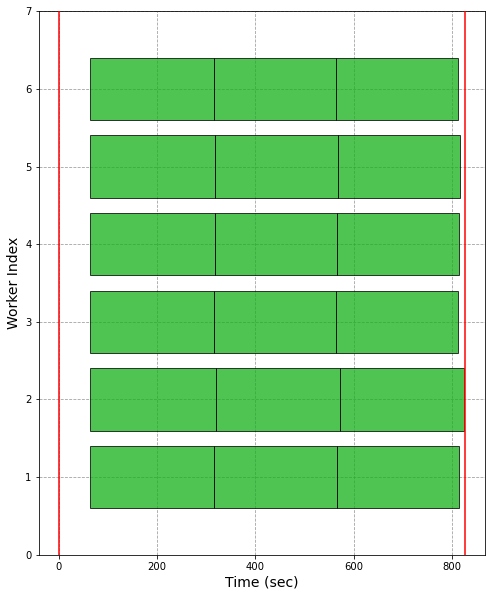

In [10]:
idx = np.argsort(task_timings['start_time'])
worker_dict = {}
for i,index in enumerate(idx):
    worker = task_timings.loc[index]['worker_id']
    if worker in worker_dict:
        continue
    else:
        worker_dict[worker] = i

figure = plt.figure(figsize=(8,10))
ax = plt.gca()
#fig, ax = plt.subplots(1)
ax.plot([0,0],[0,nWorkers+1],'r-',zorder=3)
ax.plot([total_time,total_time],[0,nWorkers+1],'r-',zorder=3)

print(task_timings.loc[0]['run_num'])
nTasks = task_timings.shape[0]
for i in range(nTasks):
    worker_int = worker_dict[task_timings.loc[i]['worker_id']]
    facecolor = 'xkcd:green'
    #if task_timings.loc[i]['run_num'] == pandas.NA:
    #    facecolor = 'xkcd:red'
    
    test = Rectangle((task_timings.loc[i]['start_time'] - st.timestamp(), worker_int + 0.6), # xy
                      task_timings.loc[i]['stop_time'] - task_timings.loc[i]['start_time'], # width
                      0.8, # height
                      facecolor=facecolor,alpha=0.75,edgecolor='xkcd:black',zorder=3)
    ax.add_patch(test)

ax.set_ylim((0,len(workers)+1))
ax.set_ylabel('Worker Index',size=14)
ax.set_xlabel('Time (sec)',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.savefig('worker_timeline.png',dpi=600,transparent=True)
plt.show()
plt.close()